In [1]:
#Loading references for pandas,numpy and visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Displaying graph in jupyter notebook
%matplotlib inline

#External reference used:
# https://www.kaggle.com/farazramtin/support-vector-machine-for-beginners-roc-auc-92
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html

In [2]:
#Getting reference of wine dataset
from sklearn.datasets import load_wine

In [3]:
#Loading wine dataset
wineDataObj = load_wine()

In [4]:
#Building dataframe to hold the data
wine_datafeatures = pd.DataFrame(wineDataObj['data'],columns = wineDataObj['feature_names'])
data = wine_datafeatures
data['target'] = wineDataObj['target']
data['class'] = data['target'].map(lambda ind: wineDataObj['target_names'][ind])

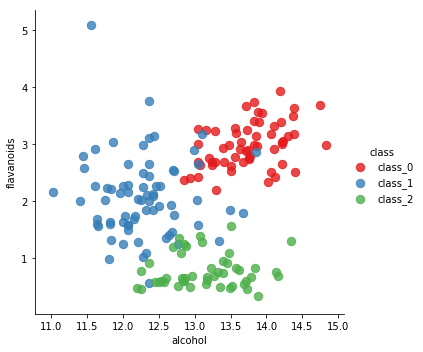

In [5]:
#Using lmplot for selecting the attributes for SVC classification
sns.lmplot('alcohol','flavanoids',data=data,hue='class',palette='Set1',fit_reg=False, scatter_kws={"s":70})

In [6]:
#Loading reference of train_test_split method to split dataset into 30:70 ratio.for attribute test_size 0.3 is specified
from sklearn.model_selection import train_test_split
#selected two attributes alcohol and flavanoids for differentiating between the two wines
X = data[['alcohol','flavanoids']]
y = wineDataObj['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=121)

In [7]:
#Importing class SVC from svm module
from sklearn.svm import SVC

In [8]:
#Instantiating the SVC class with kernel type as linear. Also decision_function_shape used here is 'ovo'
mod = SVC(kernel='linear',decision_function_shape='ovo')

In [9]:
#Fit SVM model by training data X_train,y_train
mod.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [10]:
#Perform classifications on sample data
predictions = mod.predict(X_test)

In [11]:
#Get the reference of classification_report and confusion_matrix classes
from sklearn.metrics import classification_report,confusion_matrix

In [12]:
#Printing classification report and confusion matrix
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[15  0  0]
 [ 3 18  0]
 [ 0  2 16]]


              precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       0.90      0.86      0.88        21
           2       1.00      0.89      0.94        18

   micro avg       0.91      0.91      0.91        54
   macro avg       0.91      0.92      0.91        54
weighted avg       0.91      0.91      0.91        54



In [13]:
#Instantiate SVM model with kernel type as polynomial and degree 3
polyModel = SVC(kernel='poly',degree=3,decision_function_shape='ovo')

In [16]:
#Fit SVM model with training data X_train,y_train
polyModel.fit(X_train,y_train)

#Perform classifications on sample data
newPredictions = polyModel.predict(X_test)

#Print confusion_matrix and classification_report
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

#Instantiate SVM model with kernel type as rbf
gaussianModel = SVC(kernel='rbf',decision_function_shape='ovo',gamma='scale')

#Fit SVM model with training data X_train,y_train
gaussianModel.fit(X_train,y_train)

#Perform classifications on sample data
gaussianPredict = gaussianModel.predict(X_test)

#Printing confusion matrix and classification report
print(confusion_matrix(y_test,gaussianPredict))
print("\n")
print(classification_report(y_test,gaussianPredict))



[[15  0  0]
 [ 3 18  0]
 [ 0  2 16]]


              precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       0.90      0.86      0.88        21
           2       1.00      0.89      0.94        18

   micro avg       0.91      0.91      0.91        54
   macro avg       0.91      0.92      0.91        54
weighted avg       0.91      0.91      0.91        54

[[15  0  0]
 [ 3 17  1]
 [ 0  1 17]]


              precision    recall  f1-score   support

           0       0.83      1.00      0.91        15
           1       0.94      0.81      0.87        21
           2       0.94      0.94      0.94        18

   micro avg       0.91      0.91      0.91        54
   macro avg       0.91      0.92      0.91        54
weighted avg       0.91      0.91      0.91        54



C:\Users\Anurag\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Automatically created module for IPython interactive environment


C:\Users\Anurag\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Anurag\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


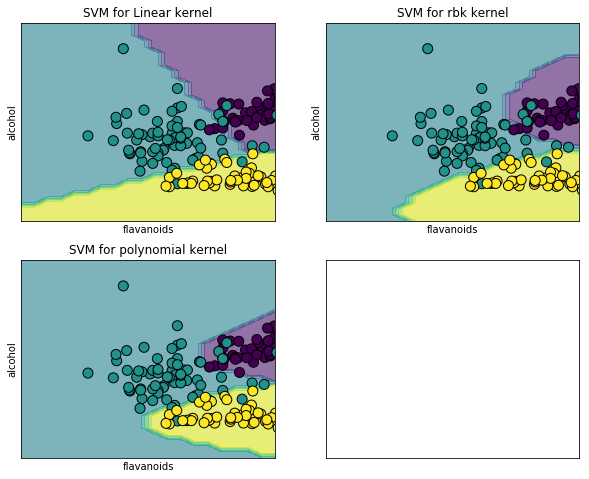

In [17]:
#plotting graph

print(__doc__)

#Importing the libraries numpy ,matplotlib and sklearn
import numpy as np
import matplotlib.pyplot as plt
from   sklearn import svm, datasets


#make_meshgrid function is used to create evenly spaced points for meshgrid plotting
#h = step size(optional)

def make_meshgrid(x,y,h=0.2):
    x_min,x_max = x.min()-1,x.max() - 1
    y_min,y_max = y.min()-1,y.max() + 1
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    
    return xx,yy


#plot_contours function is used to plot the decision boundaries for classifiers


def plot_contours(ax,clf,xx,yy,**params):
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx,yy,Z,**params)    
    return out

#Loading wine dataset
canc = load_wine()
#selecting only two attributes alcohol(at position 0 and flavanoids at position 6)
X = canc.data[:,[0,6]] 

#assigning class labels to variable y
y = canc.target 

#Creating SVC models dataobjects to store model with different kernel type.Value used for decision_function_shape is ovr
models = (svm.SVC(kernel='linear',decision_function_shape='ovo'),
          svm.SVC(kernel='rbf',decision_function_shape='ovo'),
          svm.SVC(kernel='poly',degree=3,decision_function_shape='ovo'))
          
    
#For each SVM model fit input training data 
models = (clf.fit(X,y) for clf in models) 

#This variables holds value for graph titles
titles = ('SVM for Linear kernel', 
          'SVM for rbk kernel',
          'SVM for polynomial kernel')


#Plot different subgraphs sharing the same x and y-axis. Also setting the figure size
fig,sub = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

#Get data from wine dataset and assign numpy array corresponding to all data which belongs to column alcohol to variable X0 and flavanoids to X1
X0,X1 = X[:,0],X[:,1]
#Draw the meshgrid
xx,yy = make_meshgrid(X0,X1)
    
#for each SVC model in models objects draw the graph
for clf,title,ax in zip(models,titles,sub.flatten()):
    #drawing contour lines
    plot_contours(ax,clf,xx,yy,alpha=0.6) 
    #scatter plot of y vs x with varying marker size and/or color
    ax.scatter(X0,X1,c=y,s=100,edgecolors='k') 
    #setting data limit for x-axis
    ax.set_xlim(xx.min(),xx.max())
    #setting data limit for y-axis
    ax.set_ylim(yy.min(),yy.max())
    #setting x-axis label to flavanoids
    ax.set_xlabel("flavanoids")
    #setting y-axis label to alcohol
    ax.set_ylabel("alcohol")
    #setting ticks on the X-axis
    ax.set_xticks(())
    #setting ticks on the Y-axis
    ax.set_yticks(())
    #setting title for the graph
    ax.set_title(title)
#Displaying the graph

plt.show()